In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticks
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [4]:
df = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Part 1

In [5]:
largest = df[df['SizeRank'].isin([0,1,2,3])]
largest.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
melted = pd.melt(largest,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType',
                                 'StateName', 'State', 'Metro', 'CountyName'],
                var_name = 'Date', value_name = 'Value')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [7]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [8]:
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [9]:
df_ts = melted.groupby('RegionName').resample("MS").sum()
df_ts

/var/folders/f5/bdzchg655zxf5v7h5fc_qxfh0000gn/T/ipykernel_66435/4150642235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").sum()


RegionID  SizeRank     Value
RegionName Date                                    
Chicago    2000-01-01     17426         3  166139.0
           2000-02-01     17426         3  166536.0
           2000-03-01     17426         3  167368.0
           2000-04-01     17426         3  168826.0
           2000-05-01     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-01      6181         0  768797.0
           2022-06-01      6181         0  773944.0
           2022-07-01      6181         0  777692.0
           2022-08-01      6181         0  779960.0
           2022-09-01      6181         0  781622.0

[1092 rows x 3 columns]

## Part 2

In [10]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"

In [11]:
cities = ['Chicago','New York','Los Angeles', 'Houston']
plot_df = df_ts.loc[cities]['Value'].copy()
plot_df

RegionName  Date      
Chicago     2000-01-01    166139.0
            2000-02-01    166536.0
            2000-03-01    167368.0
            2000-04-01    168826.0
            2000-05-01    170499.0
                            ...   
Houston     2022-05-01    265558.0
            2022-06-01    268901.0
            2022-07-01    271059.0
            2022-08-01    272400.0
            2022-09-01    272639.0
Name: Value, Length: 1092, dtype: float64

In [12]:
plot_df.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'Houston', 'Houston', 'Houston', 'Houston', 'Houston', 'Houston',
       'Houston', 'Houston', 'Houston', 'Houston'],
      dtype='object', name='RegionName', length=1092)

In [13]:
unstacked = plot_df.unstack(level=0)
unstacked

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,166139.0,109068.0,234181.0,253690.0
2000-02-01,166536.0,109079.0,234401.0,255517.0
2000-03-01,167368.0,108878.0,235513.0,257207.0
2000-04-01,168826.0,108881.0,237589.0,260310.0
2000-05-01,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-01,312487.0,265558.0,990391.0,768797.0
2022-06-01,314663.0,268901.0,992337.0,773944.0
2022-07-01,315910.0,271059.0,992630.0,777692.0


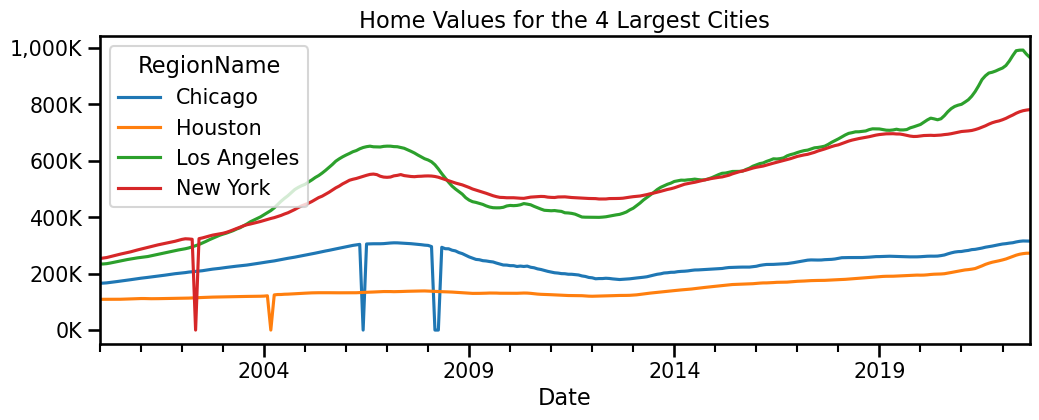

In [14]:
fmt_thous = mticks.FuncFormatter(thousands)

ax = unstacked.plot()
ax.set(title = 'Home Values for the 4 Largest Cities')
ax.yaxis.set_major_formatter(fmt_thous);


In [15]:
# Which City had the highest Typical Home Value at the end of 2008? Which had the least?
df_ts.loc[pd.IndexSlice['Los Angeles' : 'New York', '2008'],:]

RegionID  SizeRank     Value
RegionName  Date                                    
Los Angeles 2008-01-01     12447         1  603029.0
            2008-02-01     12447         1  596635.0
            2008-03-01     12447         1  586065.0
            2008-04-01     12447         1  571226.0
            2008-05-01     12447         1  554589.0
            2008-06-01     12447         1  539622.0
            2008-07-01     12447         1  524220.0
            2008-08-01     12447         1  510520.0
            2008-09-01     12447         1  500124.0
            2008-10-01     12447         1  490979.0
            2008-11-01     12447         1  481905.0
            2008-12-01     12447         1  469294.0
New York    2008-01-01      6181         0  546538.0
            2008-02-01      6181         0  546098.0
            2008-03-01      6181         0  544562.0
            2008-04-01      6181         0  541865.0
            2008-05-01      6181         0  537685.0
            2008-06-01      6181         0  533810.0
            2008-07-01      6181         0  529211.0
            2008-08-01      6181         0  525290.0
            2008-09-01      6181         0  521347.0
            2008-10-01      6181         0  518048.0
            2008-11-01      6181         0  514767.0
            2008-12-01      6181         0  510309.0

- New York had the highest value at the end of 2008

In [16]:
df_ts.loc[pd.IndexSlice['Chicago' : 'Houston', '2008'],:]

RegionID  SizeRank     Value
RegionName Date                                    
Chicago    2008-01-01     17426         3  300207.0
           2008-02-01     17426         3  296063.0
           2008-03-01     17426         3       0.0
           2008-04-01     17426         3       0.0
           2008-05-01     17426         3  293467.0
           2008-06-01     17426         3  288495.0
           2008-07-01     17426         3  288174.0
           2008-08-01     17426         3  283199.0
           2008-09-01     17426         3  280695.0
           2008-10-01     17426         3  274849.0
           2008-11-01     17426         3  271059.0
           2008-12-01     17426         3  265306.0
Houston    2008-01-01     39051         2  138208.0
           2008-02-01     39051         2  137512.0
           2008-03-01     39051         2  136795.0
           2008-04-01     39051         2  136628.0
           2008-05-01     39051         2  136228.0
           2008-06-01     39051         2  135773.0
           2008-07-01     39051         2  135392.0
           2008-08-01     39051         2  134770.0
           2008-09-01     39051         2  133932.0
           2008-10-01     39051         2  133189.0
           2008-11-01     39051         2  132247.0
           2008-12-01     39051         2  131283.0

- Houston had the lowest value at the end of 2008

In [17]:
df_ts

RegionID  SizeRank     Value
RegionName Date                                    
Chicago    2000-01-01     17426         3  166139.0
           2000-02-01     17426         3  166536.0
           2000-03-01     17426         3  167368.0
           2000-04-01     17426         3  168826.0
           2000-05-01     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-01      6181         0  768797.0
           2022-06-01      6181         0  773944.0
           2022-07-01      6181         0  777692.0
           2022-08-01      6181         0  779960.0
           2022-09-01      6181         0  781622.0

[1092 rows x 3 columns]

In [18]:
# How much did the home values change from November 2008 to December 2008 (in dollars)?
state = "New York"
state_ts = df_ts.loc['New York'].copy()

In [19]:
ts_diff = state_ts.diff()
ts_diff

,RegionID,SizeRank,Value
Date,,,
2000-01-01,NaN,NaN,NaN
2000-02-01,0.0,0.0,1827.0
2000-03-01,0.0,0.0,1690.0
2000-04-01,0.0,0.0,3103.0
2000-05-01,0.0,0.0,2894.0
...,...,...,...
2022-05-01,0.0,0.0,6476.0
2022-06-01,0.0,0.0,5147.0
2022-07-01,0.0,0.0,3748.0


- Difference in New York: $1662

In [24]:
ts_diff.loc[pd.IndexSlice['2008'],:]

,RegionID,SizeRank,Value
Date,,,
2008-01-01,0.0,0.0,285.0
2008-02-01,0.0,0.0,-440.0
2008-03-01,0.0,0.0,-1536.0
2008-04-01,0.0,0.0,-2697.0
2008-05-01,0.0,0.0,-4180.0
2008-06-01,0.0,0.0,-3875.0
2008-07-01,0.0,0.0,-4599.0
2008-08-01,0.0,0.0,-3921.0
2008-09-01,0.0,0.0,-3943.0


In [25]:
state = "Chicago"
state_ts = df_ts.loc['Chicago'].copy()

In [26]:
ts_diff = state_ts.diff()
ts_diff.loc[pd.IndexSlice['2008'],:]

,RegionID,SizeRank,Value
Date,,,
2008-01-01,0.0,0.0,-928.0
2008-02-01,0.0,0.0,-4144.0
2008-03-01,0.0,0.0,-296063.0
2008-04-01,0.0,0.0,0.0
2008-05-01,0.0,0.0,293467.0
2008-06-01,0.0,0.0,-4972.0
2008-07-01,0.0,0.0,-321.0
2008-08-01,0.0,0.0,-4975.0
2008-09-01,0.0,0.0,-2504.0


- Difference in Chicago: -$5753

In [27]:
state = "Houston"
state_ts = df_ts.loc['Houston'].copy()

In [28]:
ts_diff = state_ts.diff()
ts_diff.loc[pd.IndexSlice['2008'],:]

,RegionID,SizeRank,Value
Date,,,
2008-01-01,0.0,0.0,-594.0
2008-02-01,0.0,0.0,-696.0
2008-03-01,0.0,0.0,-717.0
2008-04-01,0.0,0.0,-167.0
2008-05-01,0.0,0.0,-400.0
2008-06-01,0.0,0.0,-455.0
2008-07-01,0.0,0.0,-381.0
2008-08-01,0.0,0.0,-622.0
2008-09-01,0.0,0.0,-838.0


- Difference in Houston: -$964

In [29]:
state = "Los Angeles"
state_ts = df_ts.loc['Los Angeles'].copy()

In [30]:
ts_diff = state_ts.diff()
ts_diff.loc[pd.IndexSlice['2008'],:]

,RegionID,SizeRank,Value
Date,,,
2008-01-01,0.0,0.0,-4357.0
2008-02-01,0.0,0.0,-6394.0
2008-03-01,0.0,0.0,-10570.0
2008-04-01,0.0,0.0,-14839.0
2008-05-01,0.0,0.0,-16637.0
2008-06-01,0.0,0.0,-14967.0
2008-07-01,0.0,0.0,-15402.0
2008-08-01,0.0,0.0,-13700.0
2008-09-01,0.0,0.0,-10396.0


- Difference in Los Angeles: -$12611